# EWMCOV

In [1]:
if (!require("arrow")) {
    install.packages("arrow");
    library(arrow);
}

Loading required package: arrow


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp




In [2]:
first_year = 2008; last_year = 2020;

In [3]:
if (!require("quantmod")) {
    install.packages("quantmod");
    library("quantmod");
}

getSymbols(c("AAPL", "MSFT", "ADBE", "GOOGL", "NVDA", "NFLX", "AMZN", "GOOG", "HPQ"),src="yahoo");

df = cbind(
  coredata(AAPL["2008-01/2021-08"])[,4],
  coredata(MSFT["2008-01/2021-08"])[,4],
  coredata(ADBE["2008-01/2021-08"])[,4],
  coredata(GOOGL["2008-01/2021-08"])[,4],
  coredata(NVDA["2008-01/2021-08"])[,4],
  coredata(NFLX["2008-01/2021-08"])[,4],
  coredata(AMZN["2008-01/2021-08"])[,4],
  coredata(GOOG["2008-01/2021-08"])[,4],
  coredata(HPQ["2008-01/2021-08"])[,4]
);

Loading required package: quantmod

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


pausing 1 second between requests for more than 5 symbols

pausing 1 second between requests for more than 5 symbols

pausing 1 second between requests for more than 5 symbols

pausing 1 second between requests for more than 5 symb

[1] "AAPL"  "MSFT"  "ADBE"  "GOOGL" "NVDA"  "NFLX"  "AMZN"  "GOOG"  "HPQ"

In [4]:
head(df)

6.958571,35.22,41.71,342.9379,8.2525,3.764286,96.25,341.3157,22.54768
6.961786,35.37,41.79,343.0080,8.1875,3.724286,95.21,341.3854,22.54768
6.430357,34.38,40.36,328.8288,7.5000,3.515714,88.79,327.2733,21.28519
6.344286,34.61,40.24,324.9500,6.7250,3.554286,88.82,323.4128,20.59491
6.116071,33.45,39.22,316.1562,6.8675,3.328571,87.88,314.6606,19.61399
6.407143,34.44,39.46,326.9269,7.2225,3.285714,85.22,325.3804,20.18165


In [5]:
tail(df)

"[3436,]",149.62,302.62,657.24,2825.23,217.93,553.41,3305.78,2847.97,28.90
"[3437,]",148.36,302.01,656.80,2841.58,222.13,547.58,3299.18,2859.00,29.39
"[3438,]",147.54,299.09,652.39,2828.81,220.68,550.12,3316.00,2842.46,29.10
"[3439,]",148.60,299.72,658.52,2880.08,226.36,558.92,3349.63,2891.01,28.92
"[3440,]",153.12,303.59,665.99,2891.81,226.88,566.18,3421.57,2909.39,29.74
"[3441,]",151.83,301.88,663.70,2893.95,223.85,569.19,3470.79,2909.24,29.74


In [6]:
dim(df)

[1] 3441    9

In [7]:
source("xpca.R")

In [8]:
means_covs = ewmcov(alpha=.9305, df[,1:9]);
means = means_covs$means;
covs = means_covs$covs;

In [9]:
length(covs)

[1] 3441

In [12]:
covs[3441]

18.44638,38.929372,103.955599,421.5746683,39.8982031,47.3620905,-21.74348,369.689555,-0.5582300
38.92937,109.144773,272.794663,1143.2214560,120.5974935,151.4166422,-415.09698,981.924886,-1.8026836
103.95560,272.794663,725.288681,3019.5028261,327.4808501,384.8756503,-675.31822,2620.471559,-3.7419389
421.57467,1143.221456,3019.502826,14405.8156417,1434.9383396,1604.2465042,-4393.35135,12150.659609,0.7957845
39.89820,120.597493,327.480850,1434.9383396,197.1789667,237.5366654,-89.07443,1262.079094,0.5728439
47.36209,151.416642,384.875650,1604.2465042,237.5366654,393.0684495,11.13440,1439.514264,-0.6176207
-21.74348,-415.096977,-675.318219,-4393.3513527,-89.0744263,11.1343997,16567.97925,-2292.727482,5.5381400
369.68955,981.924886,2620.471559,12150.6596092,1262.0790942,1439.5142639,-2292.72748,10559.095549,-2.2292553
-0.55823,-1.802684,-3.741939,0.7957845,0.5728439,-0.6176207,5.53814,-2.229255,0.5422560


In [13]:
df[3441,1:9]

[1]  151.83  301.88  663.70 2893.95  223.85  569.19 3470.79 2909.24   29.74

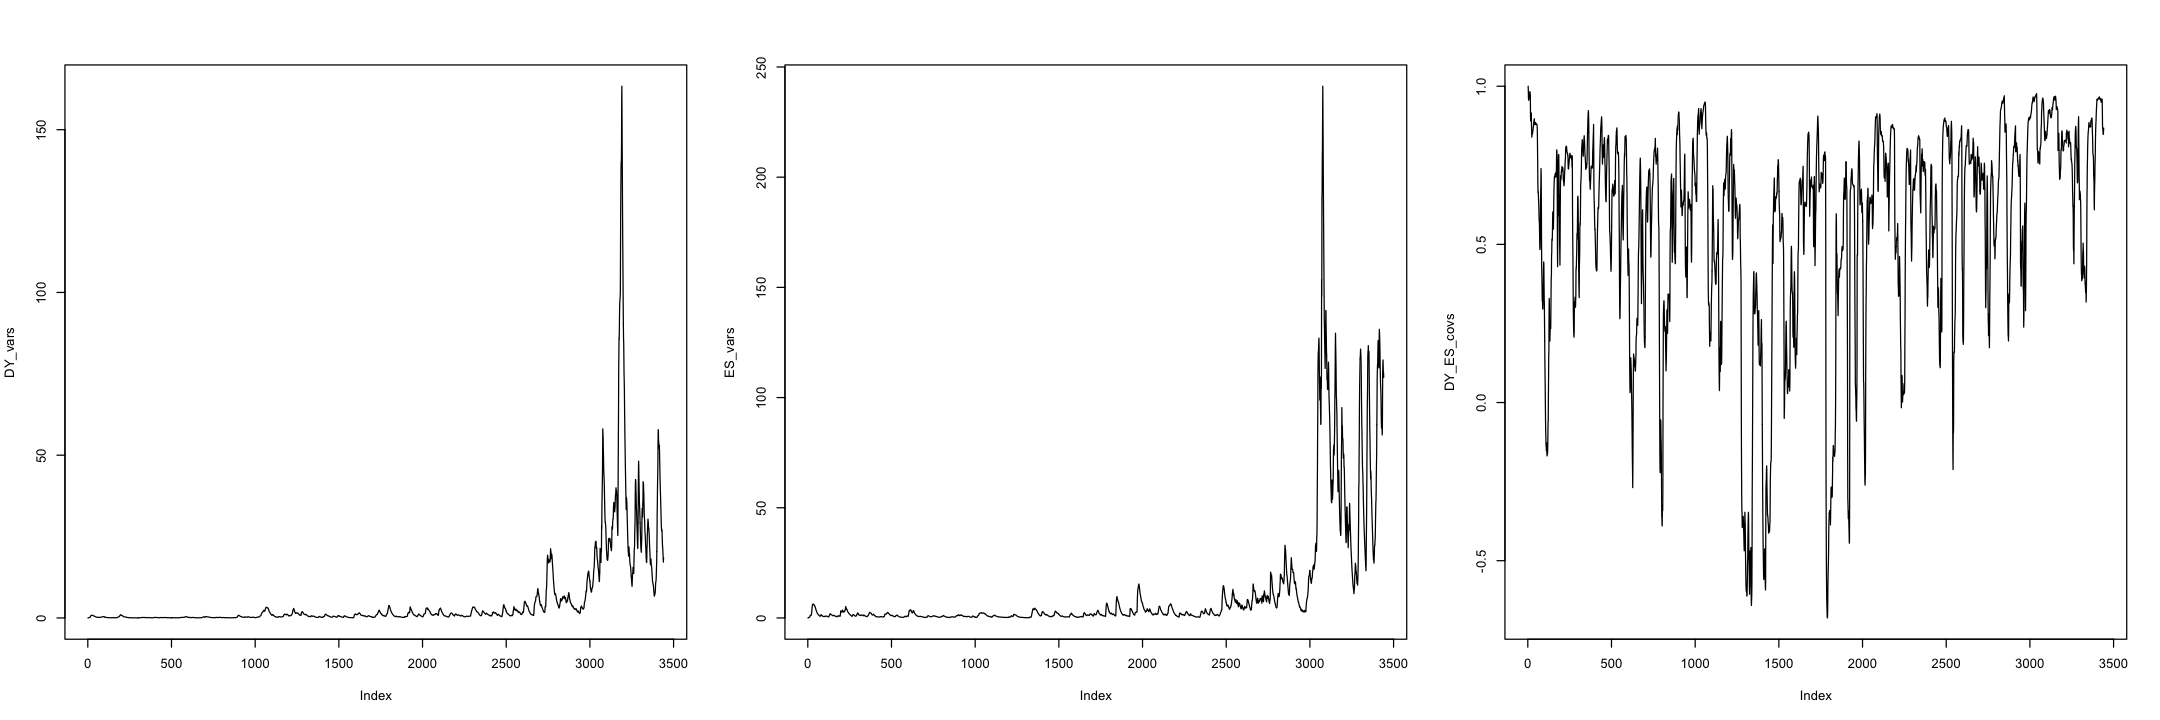

In [14]:
options(repr.plot.width=18, repr.plot.height=6)
par(mfrow=c(1,3));
DY_index = 1;
ES_index = 2;
DY_vars = rep(0, length(covs));
ES_vars = rep(0, length(covs));
DY_ES_covs = rep(0, length(covs));
for (i in 1: length(covs)) {
    S = covs[[i]]
    DY_vars[i] =  S[DY_index, DY_index];
    ES_vars[i] =  S[ES_index, ES_index];
    DY_ES_covs[i] =  S[DY_index, ES_index] / (sqrt(DY_vars[i] * ES_vars[i]));
}
plot(DY_vars, type="l");
plot(ES_vars, type="l");
plot(DY_ES_covs, type="l");

In [15]:
sample_cov = cov(df[,1:9]);
sample_cov

1093.18418,2075.5232,4686.8696,16940.19,1353.9293,5090.5092,30593.968,17140.748,88.59609
2075.52321,4112.3232,9304.2916,33178.23,2623.5206,10174.4091,60443.442,33583.855,193.12032
4686.86961,9304.2916,21285.0367,75472.95,5973.5031,23515.5413,138539.742,76341.151,445.53477
16940.18921,33178.2283,75472.9461,286905.10,21455.8318,83824.7722,493403.440,289594.183,1575.24951
1353.92932,2623.5206,5973.5031,21455.83,1801.9724,6456.5192,38759.270,21761.179,138.40533
5090.50921,10174.4091,23515.5413,83824.77,6456.5192,27227.4747,156055.825,84548.683,494.06430
30593.96804,60443.4416,138539.7419,493403.44,38759.2699,156055.8255,917535.471,498511.014,2779.56343
17140.74843,33583.8549,76341.1515,289594.18,21761.1793,84548.6825,498511.014,292468.792,1603.65161
88.59609,193.1203,445.5348,1575.25,138.4053,494.0643,2779.563,1603.652,27.76766


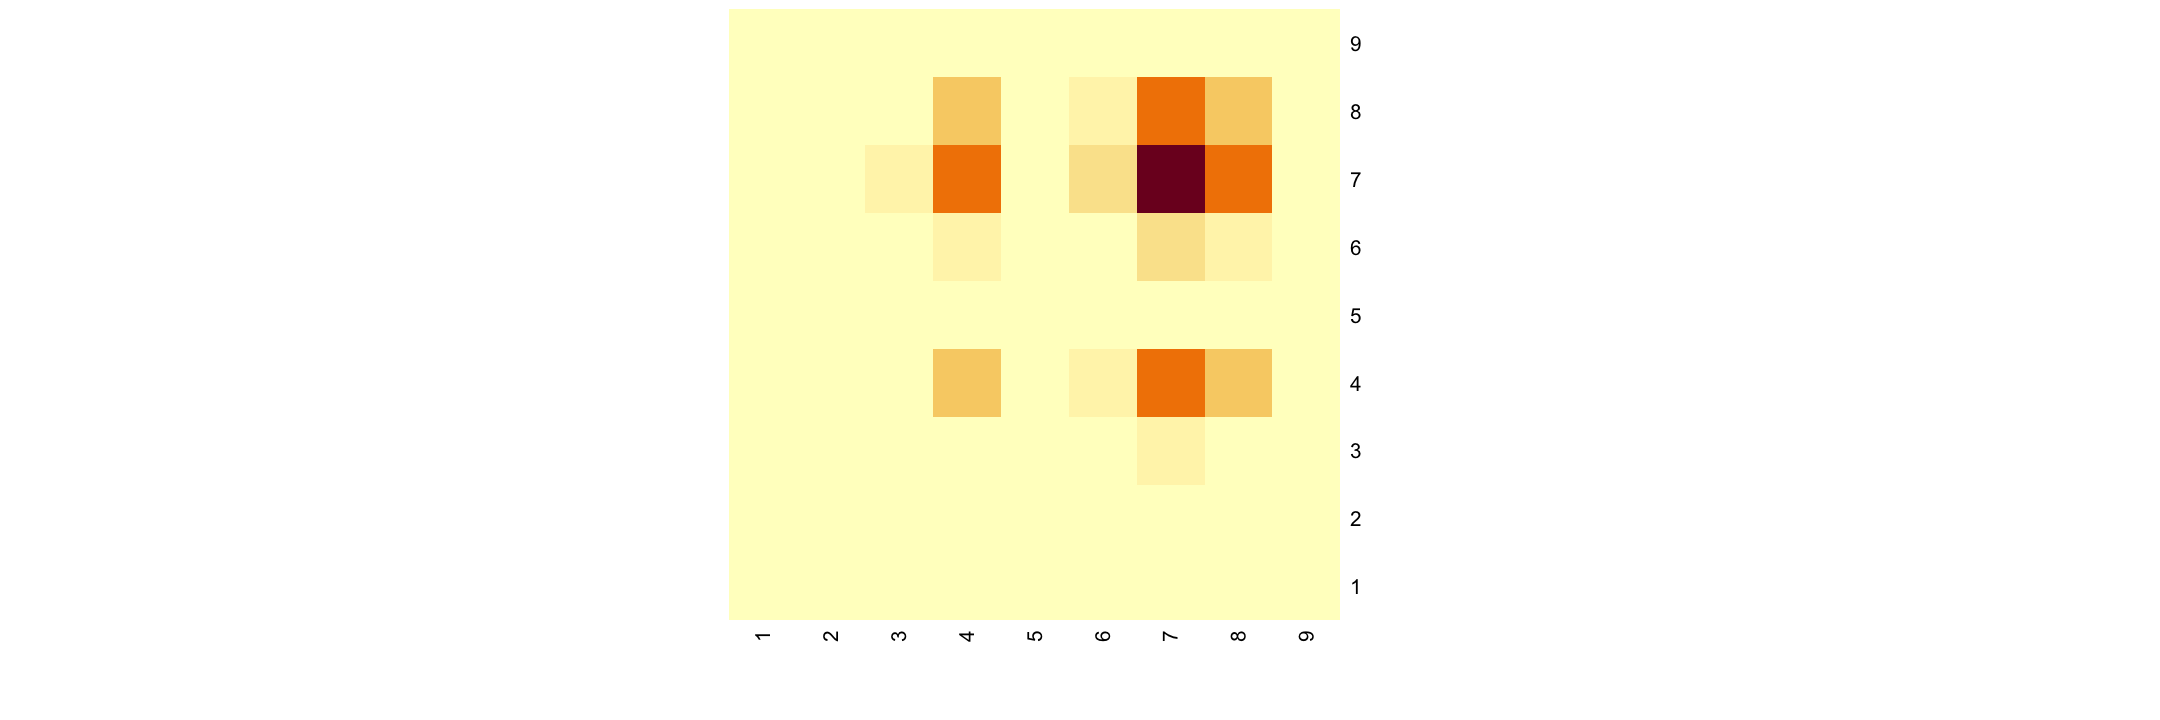

In [16]:
options(repr.plot.width=18, repr.plot.height=6)
par(mfrow=c(1,3));
heatmap(sample_cov, Colv = NA, Rowv = NA, symm = TRUE)

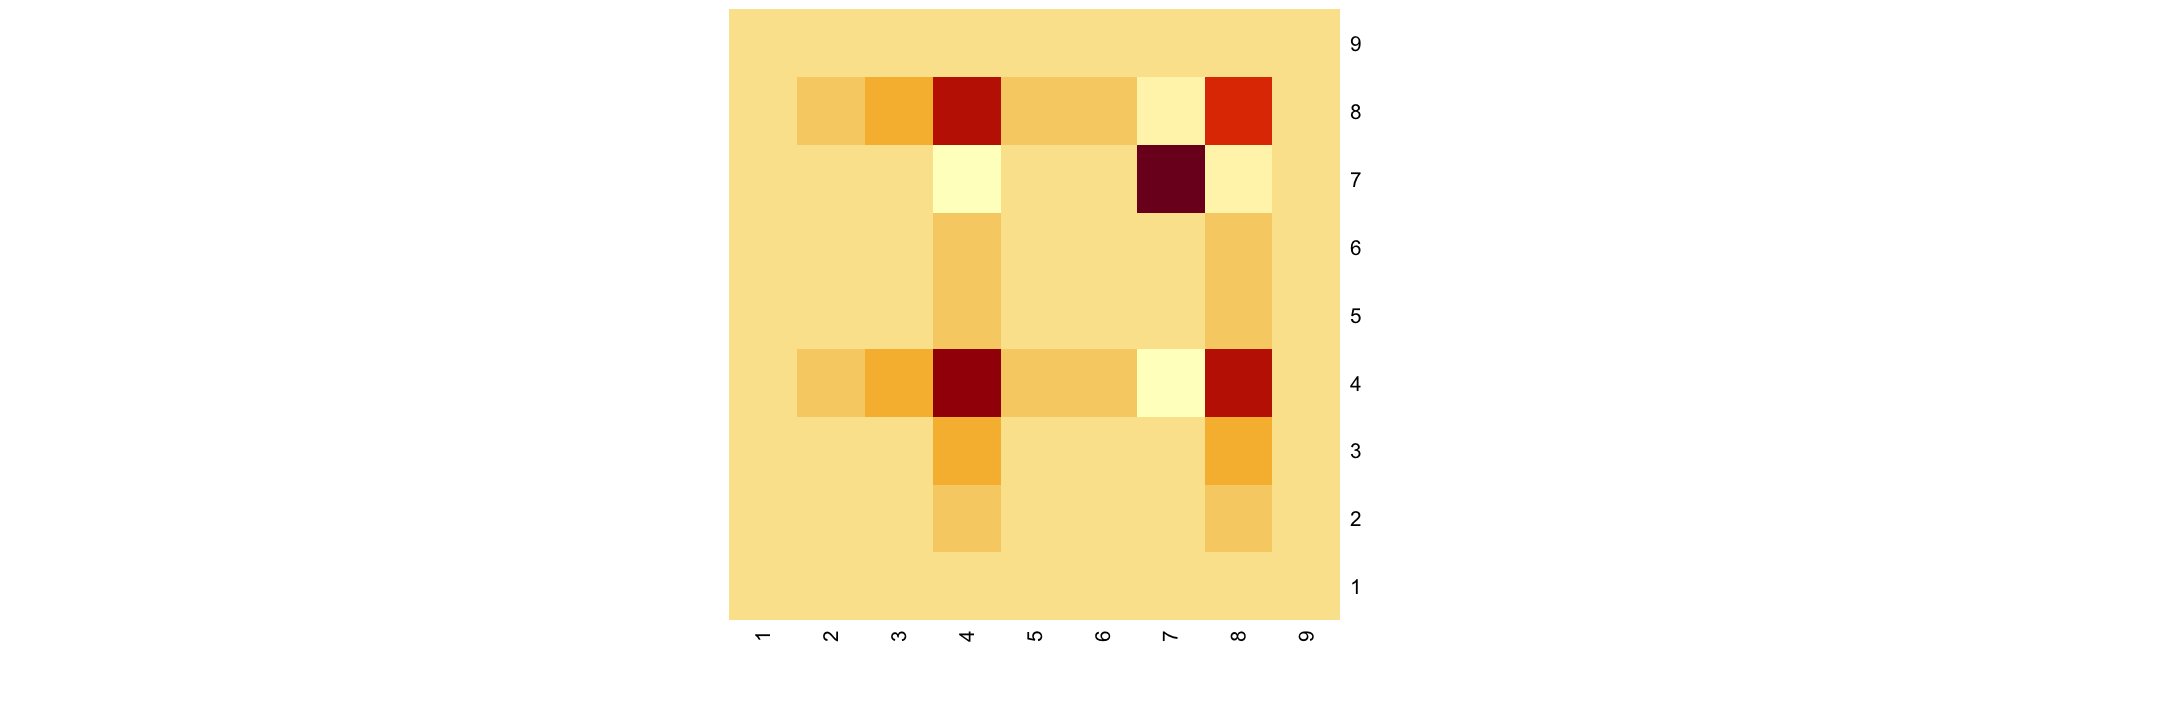

In [17]:
heatmap(covs[[length(covs)]], Colv = NA, Rowv = NA, symm = TRUE)